In [17]:
%pip install boto3

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3

In [2]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    response = requests.get(link)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    table=soup.find(class_='wikitable sortable')

    headers=table.tr
    titles=headers.find_all("abbr")
    data = {title['title']:[] for title in titles}

    for row in table.find_all('tr')[1:]:
    
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    Min=min([len(x)  for x in data.values()])
    for key in data.keys():
    
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'
      ,'https://en.wikipedia.org/wiki/LeBron_James'
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

In [5]:
michael_jordan_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Michael_Jordan')

In [6]:
michael_jordan_dict=get_basketball_stats(links[0])

In [7]:
mj_dict=get_basketball_stats(links[0])
kb_dict=get_basketball_stats(links[1])
lj_dict=get_basketball_stats(links[2])
sc_dict=get_basketball_stats(links[3])

In [8]:
mj_pd = pd.DataFrame(mj_dict)
kb_pd = pd.DataFrame(kb_dict)
lj_pd = pd.DataFrame(lj_dict)
sc_pd = pd.DataFrame(sc_dict)

In [9]:
i = 0
for name in names:
    current_dict=get_basketball_stats(links[i])
    df = pd.DataFrame(current_dict)
    print(name)
    display(df)
    print(" \n")
    i+=1

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9


 

Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5
5,80.0,80.0,38.3,0.469,0.250,0.829,5.5,5.5,1.5,0.4,25.2
6,82.0,82.0,41.5,0.451,0.383,0.843,6.9,5.9,2.2,0.8,30.0
7,65.0,64.0,37.6,0.438,0.327,0.852,5.5,5.1,1.7,0.4,24.0
8,66.0,66.0,40.7,0.433,0.339,0.816,5.9,6.0,1.3,0.8,27.6
9,80.0,80.0,41.0,0.450,0.347,0.850,5.3,4.5,1.8,0.4,35.4


 

Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


 

Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0
5,80.0,80.0,32.7,0.487,0.443,0.914,4.3,7.7,2.0,0.2,23.8
6,79.0,79.0,34.2,0.504,0.454,0.908,5.4,6.7,2.1,0.2,30.1
7,79.0,79.0,33.4,0.468,0.411,0.898,4.5,6.6,1.8,0.2,25.3
8,51.0,51.0,32.0,0.495,0.423,0.921,5.1,6.1,1.6,0.2,26.4
9,69.0,69.0,33.8,0.472,0.437,0.916,5.3,5.2,1.3,0.4,27.3


In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Points per game')

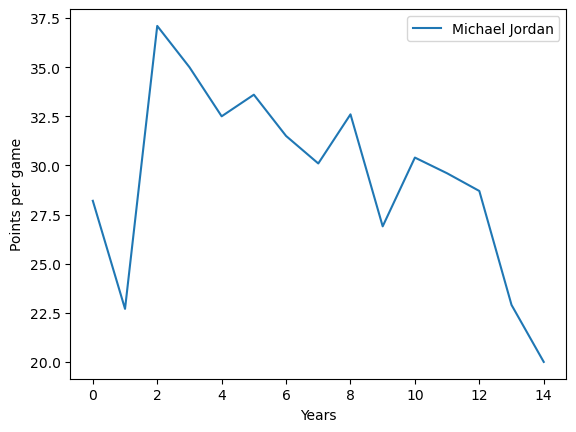

In [11]:
plt.plot(mj_pd[['Points per game']],label='Michael Jordan')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Points per game')

Text(0, 0.5, 'Points per game')

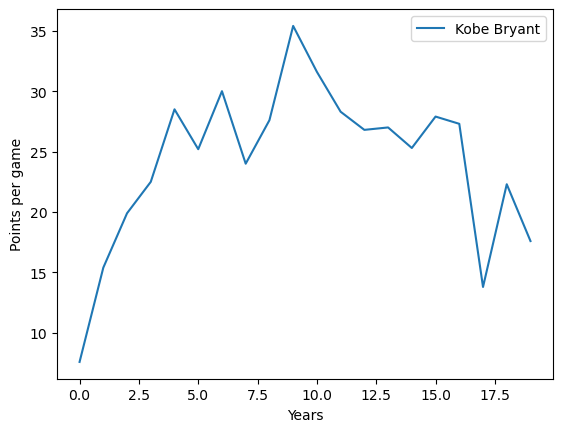

In [12]:
plt.plot(kb_pd[['Points per game']],label='Kobe Bryant')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Points per game')

Text(0, 0.5, 'Points per game')

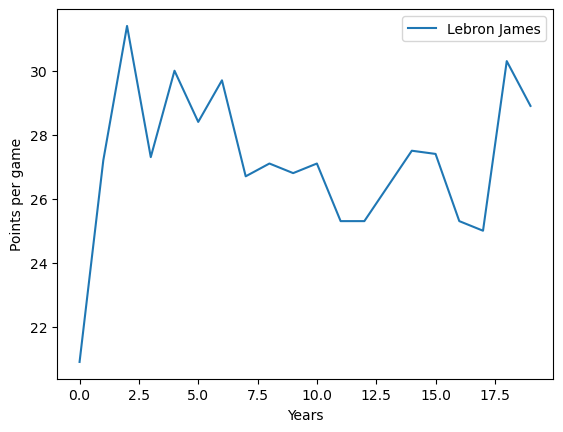

In [13]:
plt.plot(lj_pd[['Points per game']],label='Lebron James')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Points per game')

Text(0, 0.5, 'Points per game')

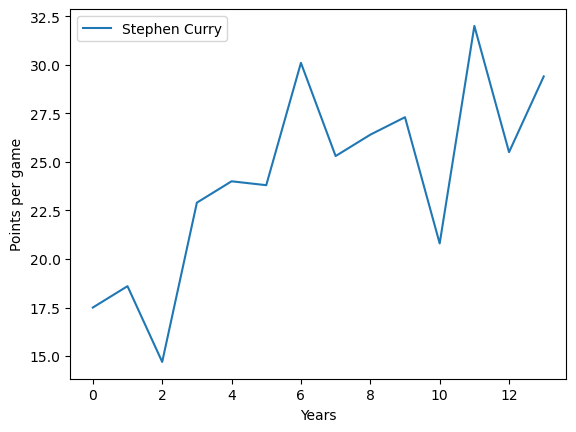

In [14]:
plt.plot(sc_pd[['Points per game']],label='Stephen Curry')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Points per game')

In [15]:
Michael_jordan_dict=get_basketball_stats(links[0])
Kobe_bryant_dict = get_basketball_stats(links[1])
Lebron_james_dict =get_basketball_stats(links[2])
Stephen_curry_dict = get_basketball_stats(links[3])
mj_df = pd.DataFrame.from_dict(Michael_jordan_dict)
kb_df = pd.DataFrame.from_dict(Kobe_bryant_dict)
lj_df = pd.DataFrame.from_dict(Lebron_james_dict)
sc_df = pd.DataFrame.from_dict(Stephen_curry_dict)

In [16]:
csv_name = 'MJ1.csv'
mj_df.to_csv(csv_name)
csv_name = 'KB1.csv'
kb_df.to_csv(csv_name)
csv_name = 'LJ1.csv'
lj_df.to_csv(csv_name)
csv_name = 'SC1.csv'
sc_df.to_csv(csv_name)